In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

Sunspot data were downloaded from NOAA https://www.ngdc.noaa.gov/stp/solar/ssndata.html. The sunspot plots are reproductions from "The Elements of Graphing Data". 

In [2]:
df = pd.read_csv('yearrg.dat', 
                 sep=r'\s{2,}',
                 engine='python', 
                 names=['year', 'yearrg'], 
                 index_col=0)

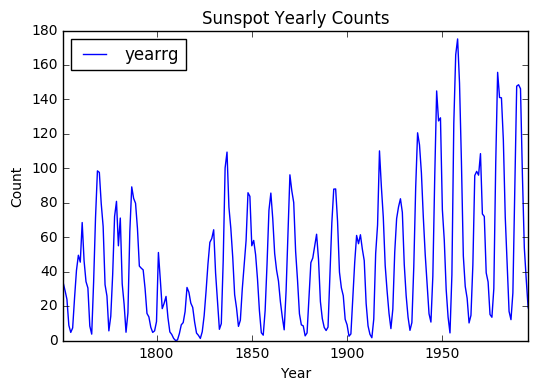

In [3]:
df[df.index > 1750].plot( #legend=False,
#                            figsize=(16, 1)
                          )
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sunspot Yearly Counts')

In [4]:
spectrum, freqs = mlab.magnitude_spectrum(df.yearrg)

Matplotlib has a built-in TeX renderer. Pretty cool.
http://matplotlib.org/users/mathtext.html#mathtext-tutorial


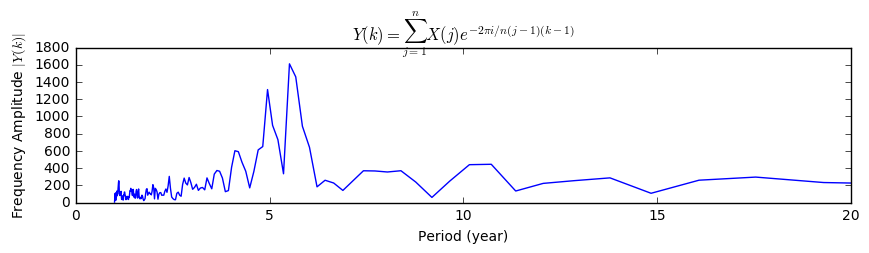

In [5]:
plt.figure(figsize=(10,2))
plt.plot(1/freqs[2:], spectrum[2:])
plt.xlim(0,20)
plt.gca().set(xlabel='Period (year)', 
              ylabel=r'Frequency Amplitude $|Y(k)|$', # Wow! Such TeX. So Equations. Much math.
              title=r'$Y(k) = \sum_{j=1}^n X(j) e^{-2\pi i/n (j-1)(k-1)}$')

In [6]:
autocorrs = [df.yearrg.autocorr(lag) for lag in range(30)]

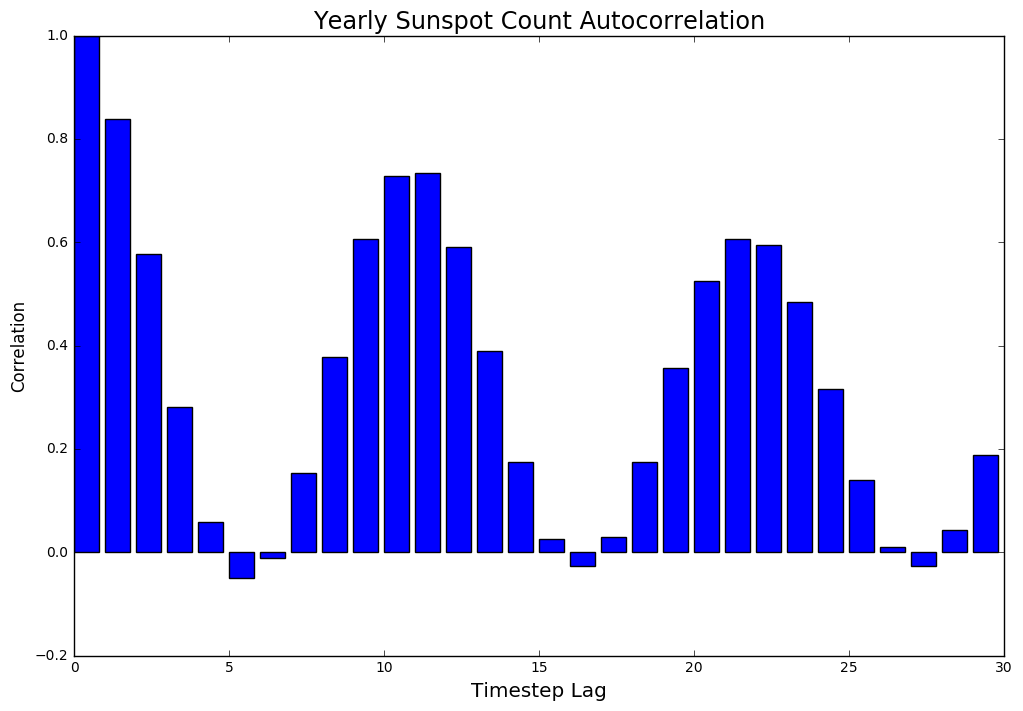

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.bar(range(30), autocorrs, color='blue')
ax.set_xlabel('Timestep Lag', size='x-large')
ax.set_ylabel('Correlation', size='large')
ax.set_title('Yearly Sunspot Count Autocorrelation', size='xx-large')